# Read Midi File and Transform Chords to PC-Sets with music21

Reading a Midi file and finding chords in music21 setting

In [38]:
from music21 import *

In [39]:
import ast

Read Midi File

In [71]:
mfile = converter.parse('chopin_raindrop_prelude.mid')

Take all tracks and render them into vertical Chords

In [72]:
mChords = mfile.chordify()

### Transform chords into PC-Sets

__Notes for this step__  : We want to filter vertically all the chords such that if there are only two notes they will not be taken into account or if a chord doesn't produce a connected graph then we have to force one. Or if we have a note delay we have to force the correct one.

We also take a list of the PrimeForm of chords. __TODO :__ Filter duplicates before taking the Primelist

In [73]:
chordList = []
chordPrime = []
for c in mChords.recurse().getElementsByClass('Chord'):
    chordList.append(c.orderedPitchClasses)
    chordPrime.append(c.primeForm)

Store PC-Sets in a list and count the elements

In [74]:
print(chordList)
howManyChords = len(chordList)
print("There is total of", howManyChords, "Chords.")

[[1, 5, 8], [1, 5, 8], [1, 5, 8], [1, 5, 8], [1, 5, 8], [1, 5, 8], [1, 5, 8], [1, 5, 6, 8, 10], [1, 5, 6, 8, 10], [1, 5, 6, 8, 10], [1, 6, 8, 10], [1, 5, 6, 10], [1, 5, 6, 8, 10], [1, 6, 8, 10], [1, 6, 8, 10], [0, 3, 6, 8], [0, 3, 6, 8], [0, 3, 6, 8], [0, 3, 6, 8], [0, 3, 6, 8], [0, 1, 3, 6, 8, 10], [0, 1, 3, 6, 10], [0, 1, 3, 6, 8, 10], [0, 1, 3, 5, 6, 8, 10], [1, 5, 6, 8, 10], [1, 5, 6, 10], [1, 6, 8, 10], [1, 6, 8, 10], [0, 3, 6], [0, 3, 6, 8], [0, 3, 5, 6, 8], [0, 3, 5, 6, 8, 10], [0, 3, 6, 8, 10], [0, 3, 6, 8, 10], [0, 1, 5, 6, 8, 10], [0, 1, 5, 6, 8, 10], [0, 1, 5, 6, 8, 10], [0, 1, 5, 8], [1, 5, 8], [1, 5, 8], [1, 5, 8], [1, 5, 8], [1, 5, 8], [0, 5, 8], [0, 5, 8], [0, 5, 6, 8], [0, 5, 6, 8], [0, 5, 6, 8], [0, 3, 5, 8], [1, 3, 5, 8], [1, 5, 8], [1, 5, 8], [1, 5, 8], [0, 1, 3, 5, 6, 8], [0, 1, 5, 6, 8], [0, 1, 5, 6, 8], [0, 1, 5, 6, 8], [0, 1, 3, 5, 6, 8], [0, 1, 5, 6, 8], [1, 2, 5, 8], [1, 3, 5, 8], [1, 5, 8], [1, 5, 6, 8], [1, 5, 8], [1, 5, 8], [1, 5, 8], [1, 5, 8], [1, 5, 8], [

### Some Plots for good measure! (you can skip that if you don't want to lose time)

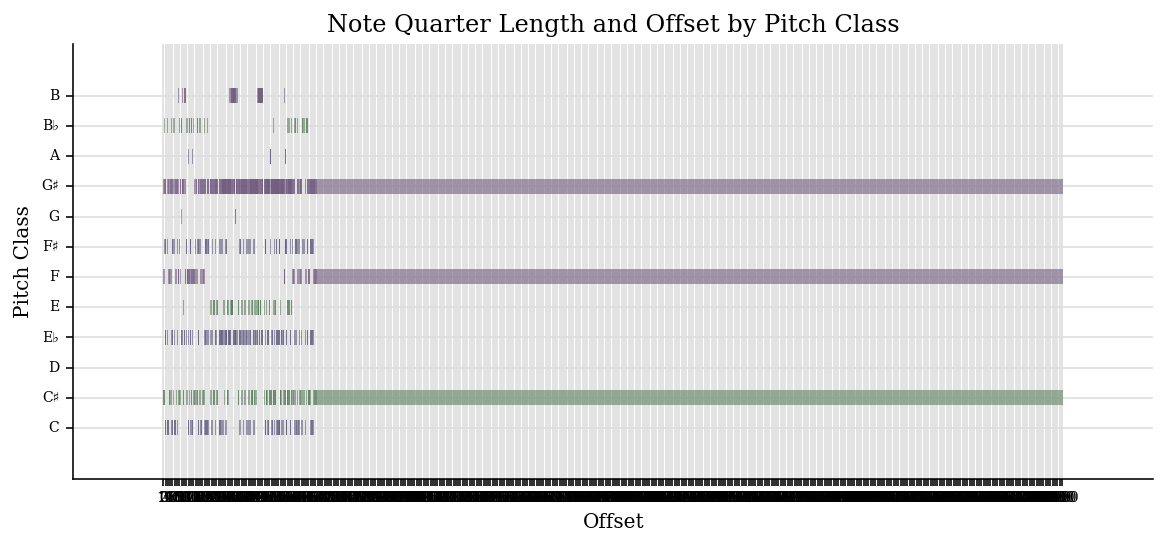

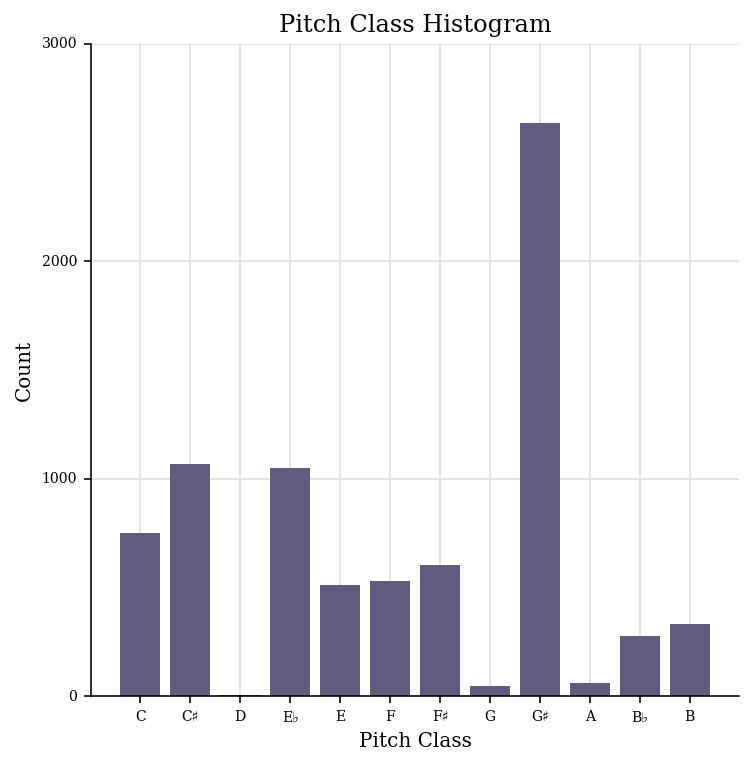

In [96]:
graph.plot.HorizontalBarPitchClassOffset(mChords).run()
graph.plot.HistogramPitchClass(mChords).run()

### Filter the Chords : If two consecutive chords are the same then abstruct the last

In [76]:
def removeDoubles(l):
    N = len(l)
    nl = []
    sl = [str(i) for i in l]
    nl.append(sl[0])
    for i in range(1,N):
        if sl[i] != sl[i-1]:
           nl.append(sl[i]) 
    return nl

In [77]:
x = removeDoubles(chordList)

Find most Frequent chord

In [78]:
def most_frequent(List): 
    counter = 0
    num = List[0] 
      
    for i in List: 
        curr_frequency = List.count(i) 
        if(curr_frequency> counter): 
            counter = curr_frequency 
            num = i 
  
    return num 

In [79]:
most_frequent(x)

'[0, 3, 6, 8]'

### Transform the filtered pc-sets to chord C E G form 

In [80]:
def pcsetToNotes(l):
    ml = []
    nl = []

    for i in l:
        nl.append(ast.literal_eval(i))
    for i in nl:
        ml.append(chord.Chord(i))
    return ml

In [81]:
bn = pcsetToNotes(x)

Interval Vectors :

In [82]:
def interVec(l):
    lp = []
    for c in l:
        lp.append(c.intervalVector)
    return lp

In [83]:
interVec(bn)

[[0, 0, 1, 1, 1, 0],
 [1, 2, 2, 2, 3, 0],
 [0, 2, 1, 1, 2, 0],
 [1, 0, 1, 2, 2, 0],
 [1, 2, 2, 2, 3, 0],
 [0, 2, 1, 1, 2, 0],
 [0, 1, 2, 1, 1, 1],
 [1, 4, 3, 2, 4, 1],
 [1, 2, 3, 1, 2, 1],
 [1, 4, 3, 2, 4, 1],
 [2, 5, 4, 3, 6, 1],
 [1, 2, 2, 2, 3, 0],
 [1, 0, 1, 2, 2, 0],
 [0, 2, 1, 1, 2, 0],
 [0, 0, 2, 0, 0, 1],
 [0, 1, 2, 1, 1, 1],
 [1, 2, 3, 1, 2, 1],
 [1, 4, 3, 2, 4, 1],
 [0, 3, 2, 2, 2, 1],
 [2, 3, 2, 3, 4, 1],
 [1, 0, 1, 2, 2, 0],
 [0, 0, 1, 1, 1, 0],
 [0, 0, 1, 1, 1, 0],
 [1, 1, 1, 1, 1, 1],
 [0, 1, 2, 1, 2, 0],
 [0, 2, 1, 1, 2, 0],
 [0, 0, 1, 1, 1, 0],
 [2, 3, 3, 2, 4, 1],
 [2, 1, 1, 2, 3, 1],
 [2, 3, 3, 2, 4, 1],
 [2, 1, 1, 2, 3, 1],
 [1, 0, 2, 1, 1, 1],
 [0, 2, 1, 1, 2, 0],
 [0, 0, 1, 1, 1, 0],
 [1, 1, 1, 1, 2, 0],
 [0, 0, 1, 1, 1, 0],
 [1, 2, 2, 2, 3, 0],
 [1, 4, 3, 2, 5, 0],
 [0, 0, 1, 1, 1, 0],
 [0, 1, 2, 1, 1, 1],
 [1, 4, 3, 2, 4, 1],
 [1, 2, 3, 1, 2, 1],
 [1, 4, 3, 2, 4, 1],
 [2, 5, 4, 3, 6, 1],
 [1, 2, 2, 2, 3, 0],
 [1, 0, 1, 2, 2, 0],
 [0, 2, 1, 1, 2, 0],
 [0, 0, 2, 0,

## Stats on Covariance between consecutive chords

In [84]:
import numpy as np

In [85]:
def getcov1(l):
	#convert list of lists to list of strings to make it hashable
    sl=[str(i) for i in l]
    #remove duplicates
    setl = set(sl)

    N = len(l) #length of piece
    dl = { j:i for i,j in enumerate(setl)} #dictionary from cords to index
    # list of cords based on their covariance index 
    invdl = len(setl)*[None] 
    for k in dl.keys():
        invdl[dl[k]]=k

    # get covariance beetween consecutive chords
    numcords = len(setl)
    cv = np.zeros((numcords,numcords))
    for i in range(1,N):
        cv[dl[sl[i-1]],dl[sl[i]]]+=1
    cv/=N
    return cv,dl,invdl

In [86]:
def getcov2(l):
	#convert list of lists to list of strings to make it hashable
    sl=[str(i) for i in l]
    #remove duplicates
    setl = set(sl)

    N = len(l) #length of piece
    dl = { j:i for i,j in enumerate(setl)} #dictionary from cords to index
    # list of cords based on their covariance index 
    invdl = len(setl)*[None] 
    for k in dl.keys():
        invdl[dl[k]]=k

    # get covariance between n and n-2
    numcords = len(setl)
    cv = np.zeros((numcords,numcords))
    for i in range(2,N):
        cv[dl[sl[i-2]],dl[sl[i]]]+=1
    cv/=N
    return cv,dl,invdl

### Get Principle Component Analysis

In [87]:
def pca(x):
    cv,dl ,invdl = getcov1(x)
    vals,vecs = np.linalg.eigh(cv)
    inds = np.argsort(vals)[::-1]
    vecs = vecs[inds]
    vals = vals[inds]
    return vals,vecs,dl,invdl

### Some Graphs

In [1]:
import matplotlib.pyplot as plt

In [2]:
cv, dl, invdl= getcov1(x)

NameError: name 'getcov1' is not defined

In [ ]:
plt.imshow(cv)
plt.set_cmap('hot')
plt.colorbar()


Get the max elements for the Covarience matrix in all the lists

In [91]:
ind = np.unravel_index(np.argmax(cv, axis=None), cv.shape)
invdl[ind[0]], invdl[ind[1]]

('[1, 3, 4, 8]', '[1, 4, 8]')

In [92]:
result = np.where(cv == np.amax(cv))
print(result)

(array([46], dtype=int32), array([38], dtype=int32))


In [93]:
def getKeysByValue(dictOfElements, valueToFind):
    listOfKeys = list()
    listOfItems = dictOfElements.items()
    for item  in listOfItems:
        if item[1] == valueToFind:
            listOfKeys.append(item[0])
    return  listOfKeys

In [94]:
getKeysByValue(dl, ind[0]), getKeysByValue(dl, ind[1])

(['[1, 3, 4, 8]'], ['[1, 4, 8]'])

### An attemp to find the key of the piece based on the Krumhansl-Schmuckler key-finding algorithm.

Statistics about the Key, discrete analysis tools and duration of cords

In [95]:
pitchHistogram = features.jSymbolic.PitchClassDistributionFeature(mChords)
f = pitchHistogram.extract()
f.vector

[0.3349014621741895,
 0.007501589319771139,
 0.035092180546726005,
 0.042085187539733,
 0.09561347743165925,
 0.13553719008264464,
 0.0007628734901462175,
 0.1336300063572791,
 0.06509853782581056,
 0.06713286713286713,
 0.07692307692307693,
 0.005721551176096631]

 ### Discete analysis tools for Key_finding

In [67]:
analysis.discrete.analyzeStream(mChords, 'Krumhansl')

<music21.key.Key of d minor>

In [68]:
analysis.discrete.analyzeStream(mChords, 'key')

<music21.key.Key of d minor>

This takes a lot of time so be patient :

In [69]:
def durationValues(x):
    avDur = features.jSymbolic.AverageNoteDurationFeature(x)
    f1 = avDur.extract()
    minDur = features.jSymbolic.MinimumNoteDurationFeature(x)
    f2 = minDur.extract()
    maxDur = features.jSymbolic.MaximumNoteDurationFeature(x)
    f3 = maxDur.extract()
    return f1.vector, f2.vector, f3.vector

In [70]:
durationValues(mChords)

([0.4859989082965799], [0.016666666666662878], [632.116666666])

### Discete Overlapped window analysis

Break down my data into smaller windows for analysis

In [36]:
def windowedAnalysis(x):
    p = analysis.discrete.Ambitus()
    wa = analysis.windowed.WindowedAnalysis(x, p)
    return wa.analyze(4)
    
    

Takes toooooo looong something's not right

In [37]:
windowedAnalysis(mChords)

([<music21.interval.Interval P19>,
  <music21.interval.Interval m21>,
  <music21.interval.Interval m21>,
  <music21.interval.Interval m21>,
  <music21.interval.Interval m21>,
  <music21.interval.Interval m21>,
  <music21.interval.Interval P18>,
  <music21.interval.Interval P18>,
  <music21.interval.Interval d18>,
  <music21.interval.Interval P18>,
  <music21.interval.Interval P18>,
  <music21.interval.Interval P22>,
  <music21.interval.Interval P22>,
  <music21.interval.Interval P22>,
  <music21.interval.Interval P22>,
  <music21.interval.Interval M23>,
  <music21.interval.Interval M20>,
  <music21.interval.Interval M20>,
  <music21.interval.Interval M20>,
  <music21.interval.Interval M20>,
  <music21.interval.Interval A19>,
  <music21.interval.Interval A19>,
  <music21.interval.Interval P18>,
  <music21.interval.Interval P18>,
  <music21.interval.Interval d18>,
  <music21.interval.Interval P18>,
  <music21.interval.Interval P18>,
  <music21.interval.Interval P18>,
  <music21.interval.